# Лабораторная работа №3. Апериодические сигналы

## Писарик Максим, 5130901/10101

## Упраженение 3.2

In [1]:
import numpy as np
import sys
sys.path.append('../')
from thinkdsp import decorate
from thinkdsp import Chirp
from thinkdsp import normalize, unbias
from thinkdsp import read_wave

Напишем класс SawtoothChirp, расширяющий Chirp для генерации пилообразного сигнала с линейно увеличивающейся или уменьшающейся частотой:

In [3]:
class SawtoothChirp(Chirp):
    """Represents a sawtooth-like signal with varying frequency."""
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = 2 * (np.pi * freqs * dts)
        phases = np.cumsum(dphis)
        cycles = phases / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

Получим спектрограмму этого сигнала и послушаем запись:

In [4]:
signal = SawtoothChirp(start=210, end=900)
wave = signal.make_wave(duration=3, framerate=4000)
wave.apodize()
wave.make_audio()

Распечатаем спектрограмму:

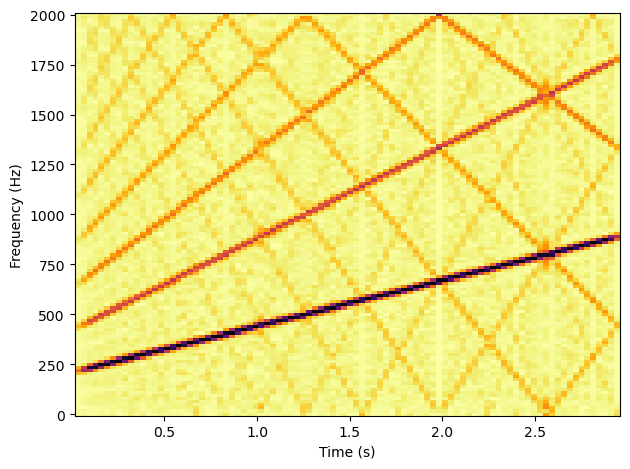

In [5]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Биения отчетливо слышны при прослушивании записи.

## Упражнение 3.3
Создадим пилообразный чирп, меняющийся от 2000 до 3500 Гц. На его основе сгенерируем сигнал длительностью 1 с и с частотой кадров 20 кГц:

In [6]:
signal = SawtoothChirp(start=2000, end=3500)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

Распечатаем спектр этого сигнала:

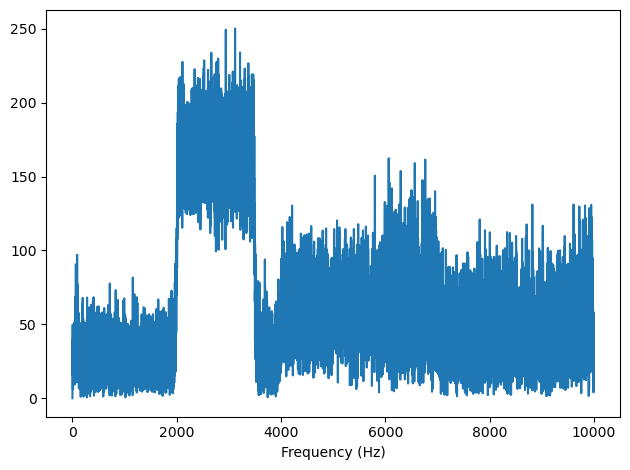

In [7]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

## Упражнение 3.4
В музыкальной терминологии глиссандо - это нота, меняющаяся от одной высоты до другой, то есть своеобразный чирп. Послушаем начало "Rhapsody in Blue" Джорджа Гершвина и распечатаем спектрограмму.

In [9]:
wave = read_wave('rhapblue.wav')
wave = wave.segment(start = 1, duration= 5)
wave.make_audio()

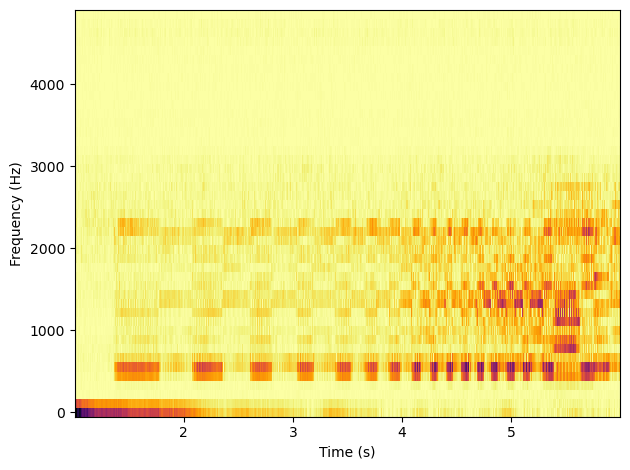

In [10]:
wave.make_spectrogram(100).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

## Упражнение 3.5

Тромбонист может играть глиссандо, выдвигая кулису тромбона и продолжая дуть в мундштук. По мере выдвижения кулисы длина всей трубы увеличивается, и получаемая высота звука обратно пропорциональна длине. Предполагая, что тромбонист двигает кулису с постоянной скоростью, узнаем, как изменяется частота со временем.

Напишем класс TromboneGliss, расширяющий Chirp и предоставляющий evaluate:

In [11]:
class TromboneGliss(Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths
        
        dts = np.diff(ts, prepend=0)
        dphis = (2 * np.pi) * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

Создадим сигнал, имитирующий глиссандо на тромбоне от C3 до F3 и обратно до C3. C3 - 262 Гц; F3 - 349 Гц:

In [12]:
low = 262
high = 349

signal = TromboneGliss(low, high)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

signal = TromboneGliss(high, low)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

wave = wave1 | wave2
wave.make_audio()

Распечатаем спектрограмму:

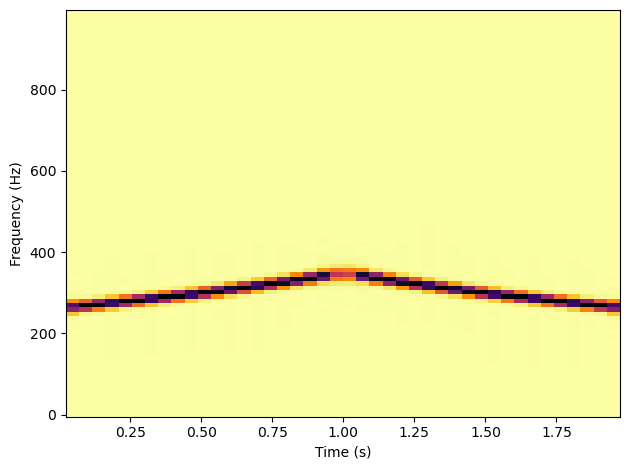

In [13]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Малая разница в начальной и конечной частотах не позволяет точно определить, на что похоже глиссандо на тромбоне - на линейный или экспоненциальный чирп.


## Упражнение 3.6
Послушаем запись серии гласных звуков и посмотрим их спектрограмму:

In [51]:
wave = read_wave('vocals.wav')
wave.make_audio()

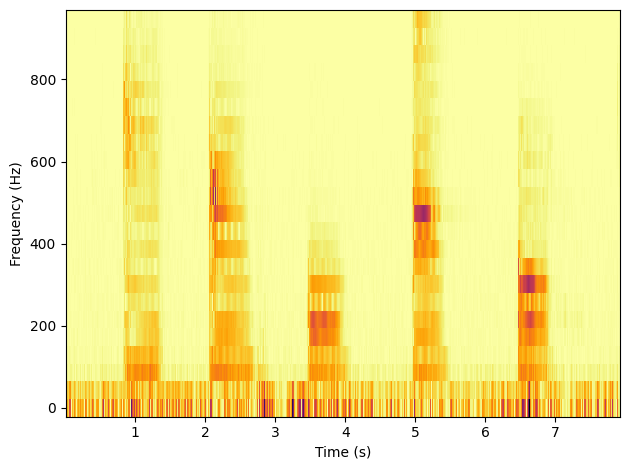

In [54]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

Судя по спектрограмме, произношение букв в данной записи очень похоже, и чётко их различить не представляется возможным.